In [26]:
#importing essential libraries for data manipulation(pandas, numpy) and visualization(matplotlib, seaborn)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [27]:
#loading the amazon dataset from csv into a pandas dataframe
amazon=pd.read_csv('amazon.csv')

In [28]:
#previewing the first 5 rows of dataset to understand it's structure and key columns.
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [29]:
#clean pricing columns: removing the currency symbols and commas so that discounted price and actual price can be converted into numeric values
amazon['discounted_price']=amazon['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
amazon['actual_price']=amazon['actual_price'].str.replace('₹','').str.replace(',','').astype(float)

In [30]:
#Cleaning discount column: removing '%'sign and converting it to float for numerical analysis
amazon['discount_percentage']=amazon['discount_percentage'].str.replace('%','').astype(float)

In [31]:
#converting ratingcolumnto numeric type(float), coercing invalid values to NaN for easier handling
amazon['rating']=pd.to_numeric(amazon['rating'],errors='coerce')

In [32]:
#checking for missing values in the data
amazon.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [33]:
#drop rows where critical values of rating count and ratings are missing 
amazon=amazon.dropna(subset=['rating','rating_count'])

In [15]:
#category insights

In [16]:
# Average rating by category
avg_ratings = amazon.groupby("category")["rating"].mean().sort_values(ascending=False).head(10)

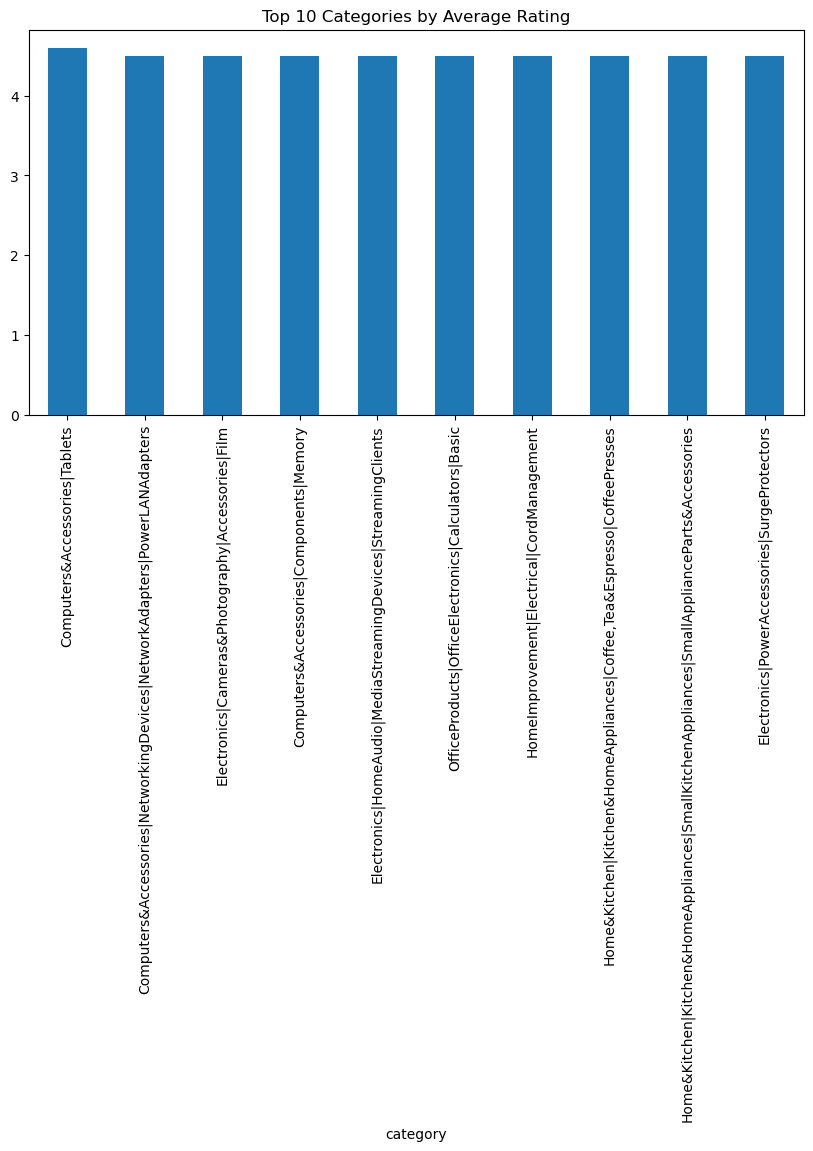

In [17]:
#plotting average ratings
avg_ratings.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Categories by Average Rating")
plt.show()

In [18]:
# Most reviewed products
top_reviewed = amazon.sort_values("rating_count", ascending=False).head(10)
top_reviewed[["product_name", "rating_count", "rating", "discounted_price"]]

,product_name,rating_count,rating,discounted_price
750,Eveready Red 1012 AAA Batteries - Pack of 10,989,4.3,159.0
977,Sennheiser CX 80S in-Ear Wired Headphones with...,"98,250",4.1,1490.0
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976,3.7,809.0
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974,4.3,389.0
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,974,4.3,339.0
823,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974,4.3,389.0
536,boAt Rockerz 400 Bluetooth On Ear Headphones W...,"97,175",4.1,1399.0
918,boAt Rockerz 400 Bluetooth On Ear Headphones W...,"97,174",4.1,1399.0
1332,Amazon Basics 300 W Hand Blender with Stainles...,97,4.0,799.0
1165,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,97,4.0,79.0


In [16]:
#exploratory analysis

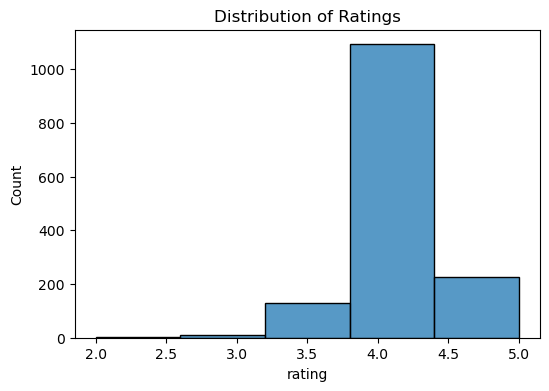

In [35]:
# Distribution of product ratings to see overall customer sentiment
plt.figure(figsize=(6,4))
sns.histplot(amazon["rating"], bins=5, kde=False)
plt.title("Distribution of Ratings")
plt.show()

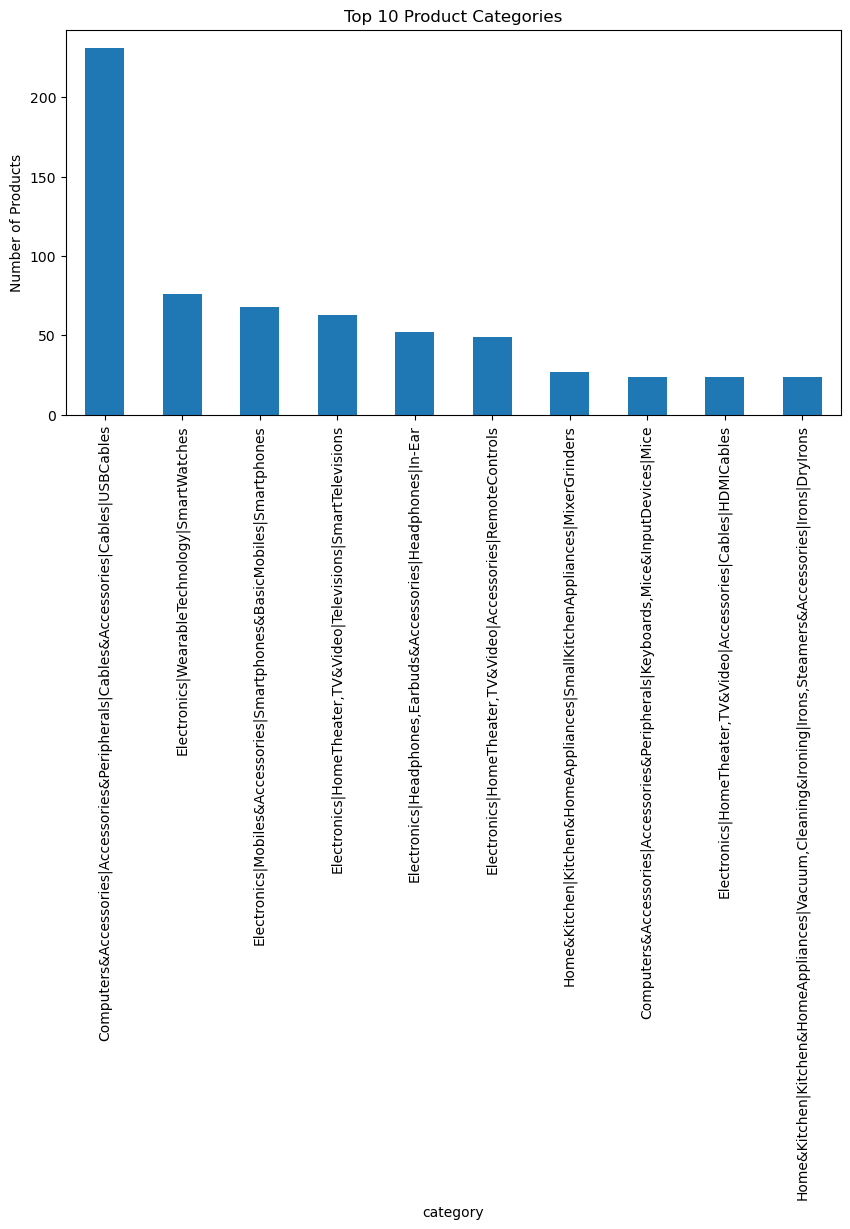

In [34]:
# Top 10 categories by the number of products in the dataset
plt.figure(figsize=(10,5))
amazon["category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Product Categories")
plt.ylabel("Number of Products")
plt.show()

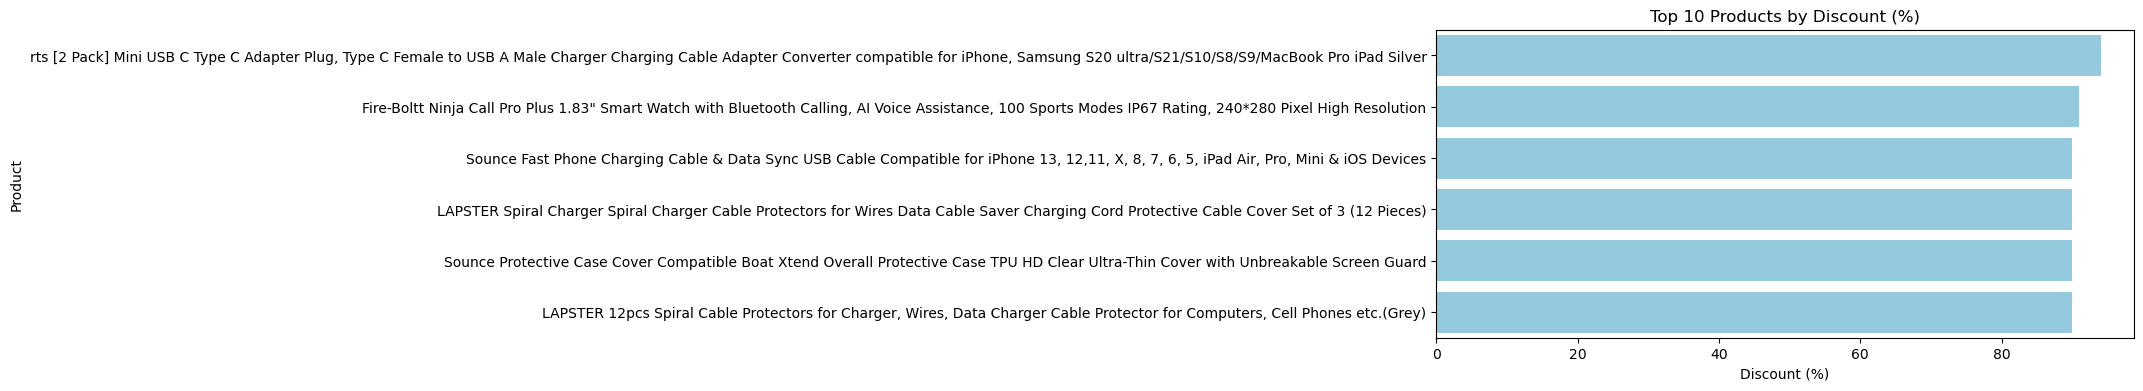

In [37]:
# Top 10 most discounted products 
top10 = amazon.sort_values("discount_percentage", ascending=False).head(10)
plt.figure(figsize=(9,4))
sns.barplot(data=top10, x="discount_percentage", y="product_name", color="skyblue")
plt.title("Top 10 Products by Discount (%)", fontsize=12)
plt.xlabel("Discount (%)")
plt.ylabel("Product")
plt.show()

In [36]:
#creating a list of top 10 categories in the data
amazon['category'].value_counts().head(10)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        231
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitch

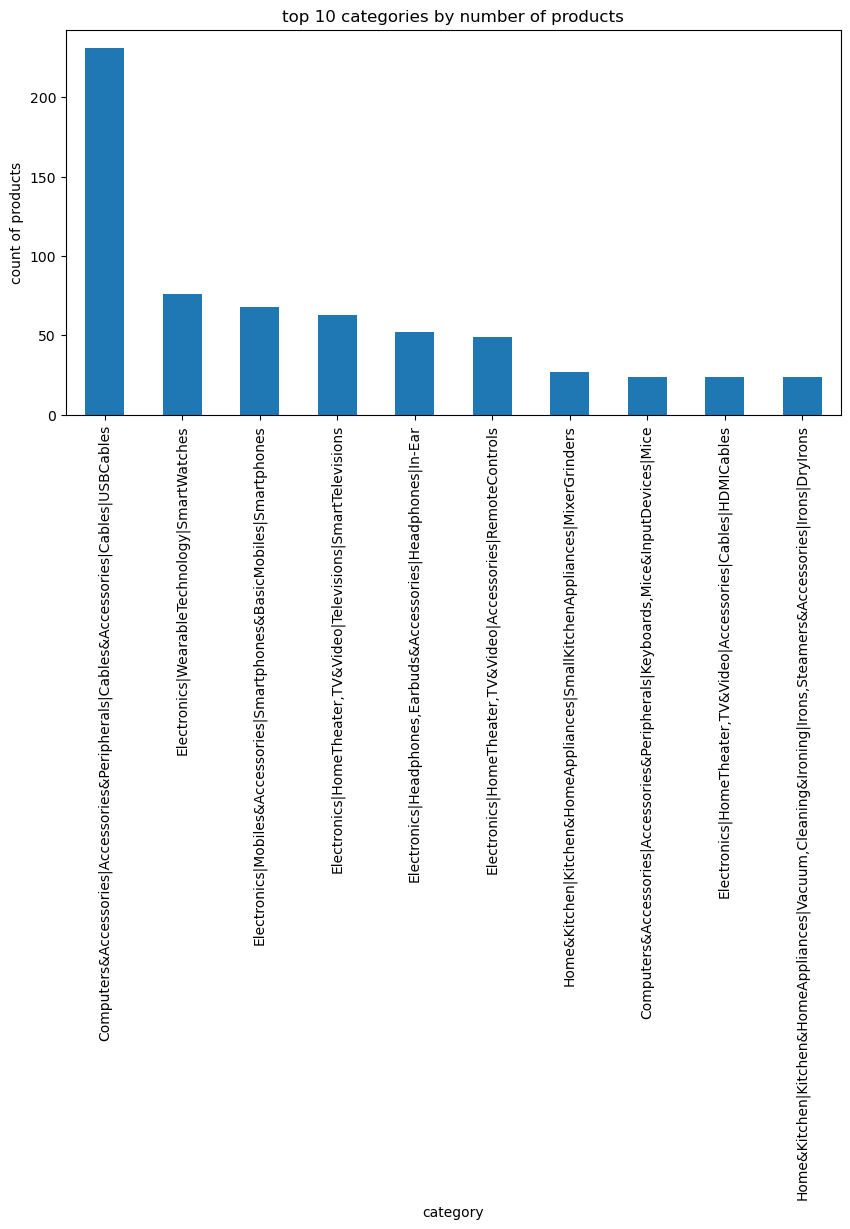

In [25]:
#plotting the top 10 categories side by side
plt.figure(figsize=(10,5))
amazon['category'].value_counts().head(10).plot(kind='bar')
plt.title('top 10 categories by number of products')
plt.xlabel('category')
plt.ylabel('count of products')
plt.show()

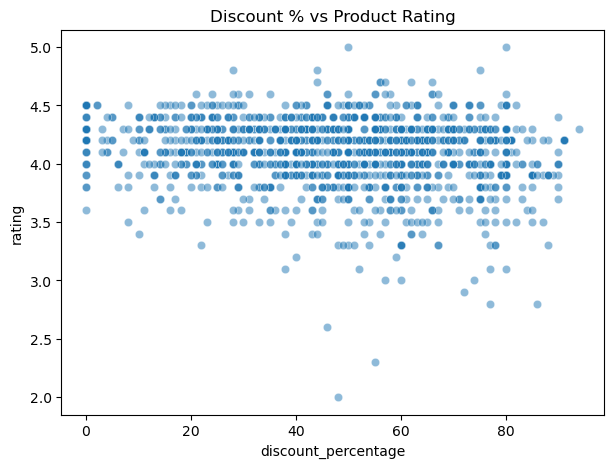

In [38]:
# Scatter plot: Do higher discounts lead to higher product ratings?
plt.figure(figsize=(7,5))
sns.scatterplot(data=amazon, x="discount_percentage", y="rating", alpha=0.5)
plt.title("Discount % vs Product Rating")
plt.show()

In [40]:
# Select top 10 products by review count
top10 = amazon.sort_values("rating_count", ascending=False).head(10)

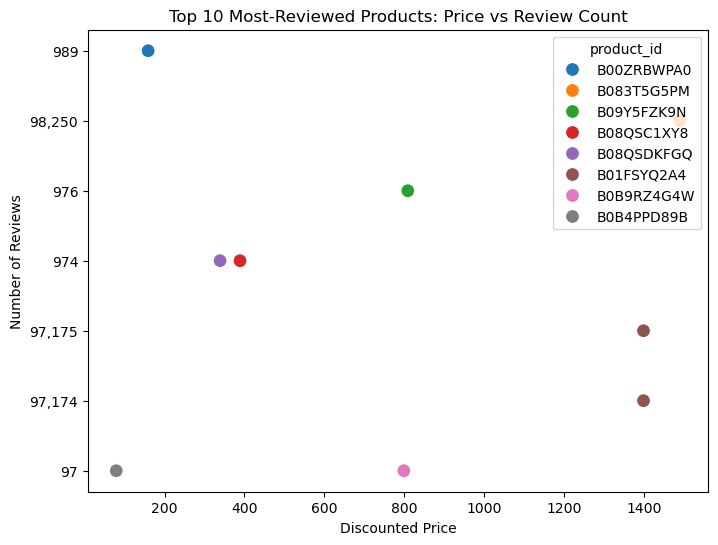

In [44]:
# Scatter plot: Price vs Reviews for top 10 products
plt.figure(figsize=(8,6))
sns.scatterplot(data=top10, x="discounted_price", y="rating_count", hue="product_id", s=100)
plt.title("Top 10 Most-Reviewed Products: Price vs Review Count")
plt.xlabel("Discounted Price")
plt.ylabel("Number of Reviews")
plt.show()

In [45]:
# Displayed top 10 product details for reference
top10[["product_id","product_name", "discounted_price", "rating", "rating_count"]]

,product_id,product_name,discounted_price,rating,rating_count
750,B00ZRBWPA0,Eveready Red 1012 AAA Batteries - Pack of 10,159.0,4.3,989
977,B083T5G5PM,Sennheiser CX 80S in-Ear Wired Headphones with...,1490.0,4.1,"98,250"
1059,B09Y5FZK9N,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,809.0,3.7,976
32,B08QSC1XY8,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,389.0,4.3,974
151,B08QSDKFGQ,Zoul USB Type C Fast Charging 3A Nylon Braided...,339.0,4.3,974
823,B08QSC1XY8,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,389.0,4.3,974
536,B01FSYQ2A4,boAt Rockerz 400 Bluetooth On Ear Headphones W...,1399.0,4.1,"97,175"
918,B01FSYQ2A4,boAt Rockerz 400 Bluetooth On Ear Headphones W...,1399.0,4.1,"97,174"
1332,B0B9RZ4G4W,Amazon Basics 300 W Hand Blender with Stainles...,799.0,4.0,97
1165,B0B4PPD89B,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,79.0,4.0,97


In [46]:
##results analysis
#1)In the ratings histogram we can see that most of the ratings lie between 3.5 and 4.5 this indicates that the products generally have positive customer sentiment
#2)I showed top 10 categories by count which where electronics, fashion etc and then I compared discounts by categories   some had bigger discounts, but
#thosecategories didn't always show higher ratings 
#so, we can say that more product discounts didn't always guarantee higher ratings
#3) from the scatter of discounted price vs rating_count and especially the top10 products table/plot, we see cheap products with huge review counts.
#Meanwhile many expensive products had very few  reviews.